## 3.2 De-anonymizing a dataset – 50 marks
For this task, we are using a dataset provided to us by our colleagues. The provided Dataset -according to our colleagues- has been anonymized using bayesian inferences. 
- The provided Dataset: police-shooting_anonymized.csv

### 3.2.1 Using standard search mechanisms, determine if there are any elements within the dataset that you received, that allow for de-anonymizations to occur. Make a note of what you find and explain the procedure you used. 
First of all, we look at the data present in our new dataset. The dataset contains information about victims of police shootings with information about where they happened (city, state, longitude, latitude), when they happened (date), information about the victims (gender, race, manner of death, signs_of_mental_illness, threat level, flee) and body_camera giving information about whether the police officer was wearing a body cam. 



In [15]:
import pandas as pd
df = pd.read_csv("police_shooting_anonymized.csv")
print(df.iloc[:5])

         date   manner_of_death       armed   age gender race  \
0  2022-11-06              shot         gun  20.0      M    H   
1  2016-01-20              shot         gun  32.0      M    W   
2  2020-08-29  shot and Tasered     unarmed  56.0      M    B   
3  2020-07-12              shot  toy weapon  52.0      F    B   
4  2019-04-29              shot    nail gun  19.0      M    B   

               city state  signs_of_mental_illness threat_level         flee  \
0         Baltimore    AZ                     True       attack  Not fleeing   
1         Kerrville    ME                    False       attack  Not fleeing   
2  Dearborn Heights    NC                    False        other  Not fleeing   
3   Butler Township    FL                     True       attack  Not fleeing   
4            Edmond    MS                    False       attack  Not fleeing   

   body_camera  longitude  latitude  is_geocoding_exact  
0        False    -83.663    37.472                True  
1        Fal

Our Approach to test whether de-anonymizations can occur: 

In our case, we tried to google searching some of the entries on the internet trying to match information with the given dataset. The first entry of the dataset directly provides us with multiple online articles talking about the shooting in Baltimore on the 06.11.2022 without mentioning the name of the victim. We can find the respective name after searching for another while in a YouTube video showing the body cam of an officer present at the shooting on the 06.11.2022 - The name of the victim was Tyree Moorehead. 
Going further we tried matching other entries to real world events and there wasn't one entry we did not succeed with a simple google search. For the first five entries, the victim names are: 
- Tyree Moorehead
- Michael Clyde Lynch
- Donny Walker
- Terena Nicole Thurman
- Isaiah Lewis

### 3.2.2 Design a de-anonymisation algorithm and apply to both the received dataset and your dataset. Report on the following:
In this section, we aim to explore the underlying patterns and potentially re-identify anonymized records in our police-shooting dataset containing sensitive information about victims of fatal police shootings. The dataset includes demographic details, incident locations, and other attributes that could potentially be pieced together to de-anonymize the data.

To achieve this, we will utilize Factor Analysis of Mixed Data (FAMD), which is an extension of principal component analysis (PCA) that is suitable for mixed data types (categorical and numerical). FAMD allows us to reduce the dimensionality of the data while preserving the relationships between both numerical and categorical variables. The rationale behind the choice of FAMD and the specific parameters set in the initialization of the prince.FAMD object is as follows:

1. n_components=2: We choose to extract two principal components to simplify visualization and interpretation of the data in a 2D space, which is often sufficient to capture significant variance in the data.
2. n_iter=3: A lower number of iterations provides a quicker approximation of the FAMD solution, this can be advantageous for large datasets.


Lastly, we visualize the z-scores as an interactive plot to get a rough overview of what outliers have been detected. Those outliers are then written to a new .csv file. 

The "z_scores > 3 rule", which is used in the code below for identifying outliers is based on the empirical rule of normal distribution, stating that about 99.7% of data lies within three standard deviations of the mean. Points outside this range are rare (less than 0.3% probability) and considered statistically significant outliers. This rule offers a balance between sensitivity and specificity, making it a practical standard for flagging extreme deviations in data as outliers.

### a) What are you able to discover using your de-anonymisation algorithm?
First of all, we apply our deanonymization algorithm to the police-shooting dataset we've received from our colleagues. After that, we will apply this algorithm to our anonymized athletes dataset from exercise #Assignment 2-3, 3.1 with k=2 anonymity satisfied: 

In [16]:
#!pip install -U "vegafusion[embed]" # we use vegafusion for interactive chart plots

In [17]:
import pandas as pd
from scipy import stats
import numpy as np
import prince
import warnings
import altair as alt
alt.data_transformers.enable("vegafusion")
warnings.filterwarnings('ignore', category=pd.errors.PerformanceWarning)

df = pd.read_csv('police_shooting_anonymized.csv')

# Initialize FAMD object: specifying the number of components (n_components)
famd = prince.FAMD(
    n_components=2,
    n_iter=3,
    copy=True,
    check_input=True,
    random_state=42,
    engine="sklearn",
    handle_unknown="error"  
)
famd = famd.fit(df)

df_transformed = famd.transform(df)
z_scores = np.abs(stats.zscore(df_transformed))
outliers = np.where(z_scores > 3) 

outlier_rows = df.iloc[outliers[0]]
#outlier_rows.to_csv('police_shooting_outliers.csv', index=False)

famd.plot(
    df,
    x_component=0,
    y_component=1
)

alt.LayerChart(...)

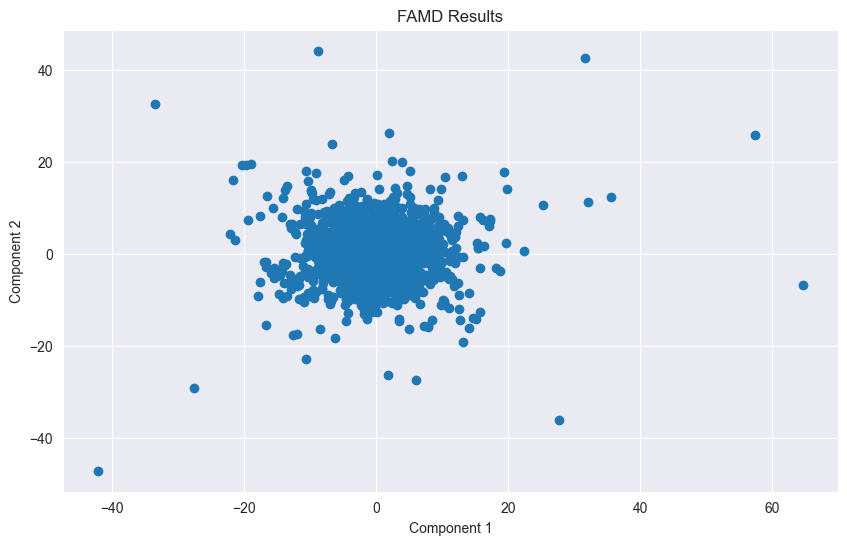

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  
plt.scatter(df_transformed[0], df_transformed[1]) 

plt.title('FAMD Results')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)

plt.show()  

Now, lets apply the same algorithm to our anonymized athletes dataset from exercise #Assignment 2-3, 3.1 with k=2 anonymity satisfied and multiple anonymization steps went through. 

In [19]:
import pandas as pd
from scipy import stats
import numpy as np
import prince
import warnings
import altair as alt
alt.data_transformers.enable("vegafusion")
warnings.filterwarnings('ignore', category=pd.errors.PerformanceWarning)
df = pd.read_csv('athletes_anonymized_#2-3.csv')

# Initialize FAMD object: specifying the number of components (n_components)
famd = prince.FAMD(
    n_components=2,
    n_iter=3,
    copy=True,
    check_input=True,
    random_state=42,
    engine="sklearn",
    handle_unknown="error"  
)
famd = famd.fit(df)

df_transformed = famd.transform(df)
z_scores = np.abs(stats.zscore(df_transformed))
outliers = np.where(z_scores > 3) 

outlier_rows = df.iloc[outliers[0]]
outlier_rows.to_csv('athletes_outliers.csv', index=False)

famd.plot(
    df,
    x_component=0,
    y_component=1
)

alt.LayerChart(...)

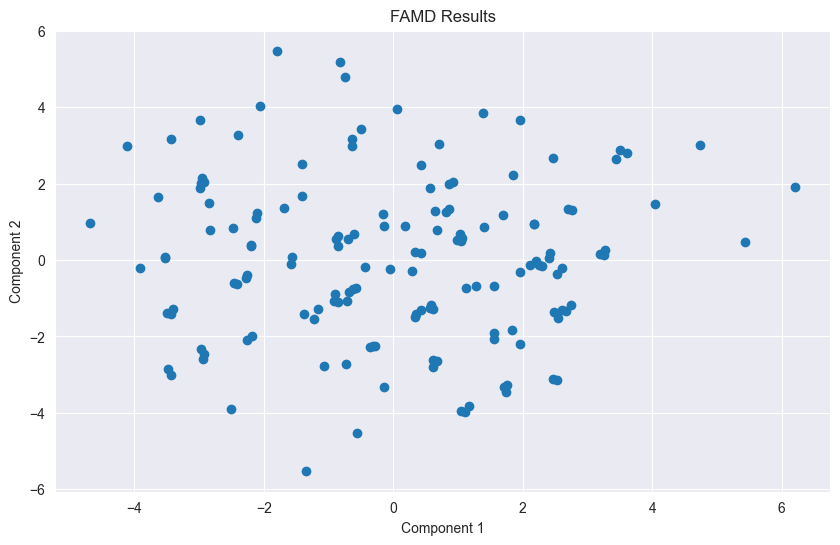

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  
plt.scatter(df_transformed[0], df_transformed[1]) 

plt.title('FAMD Results')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)

plt.show()  

#### Interpreting the results
The coordinates of the plot represent the correlation of each variable with the principal components. In FAMD each variable is projected into the same reduced dimensional space as the observations. 

For numerical values, the coordinates are directly interpretable as correlations between the variables and the principal components. A variable's coordinate on a principal component axis shows how strongly that variable correlates with the component, and the sign indicates the direction of the correlation.
For categorical values, the coordinates are the result of coding the categories as dummy variables and then projecting these onto the principal components. The position of a categorical variable's coordinates on a principal component axis shows how strongly and in what direction the variable's categories relate to the component.

In both cases, variables that are close to each other in the plot are positively correlated, while those that are on opposite sides of the plot origin are negatively correlated. Variables that are close to the origin do not have a strong correlation with the principal components.

For example, in this example with the anonymized police-shooting dataset, the coordinate for 'city' and 'date' is far along the first principal component, it suggests that 'city' as well as 'date' is a significant factor in the variance captured by that principal component. This fact is being used in our calculation to find outliers in the dataset. For our athletes_anonymized dataset, we can see that the distribution of the calculated z-values is much more evenly spread out, implying less potential for outlier detection. 
For the police-shooting dataset, we can detect many outliers: Out of 7898 entries, 239 entries have been detected as potential outliers satisfying the z_scores > 3 rule we've set for both of the datasets. Thats 3.3% of the whole dataset. In contrast, the athletes_anonymized does not contain one outlier satisfying the z_scores > 3 rule. 

Conclusion: The anonymized police-shooting dataset is not optimally anonymized to prevent the possibility of outlier detection. As we've shown in 3.2.1, it's pretty easy to de-anonymize the dataset entirely without applying a de-anonymization algorithm in the first place. On the other hand for the anonymized athletes dataset, we were unable to identify any outliers. Going further, we tried out matching different outlier values from the anonymized athletes dataset with Google sources like in our 3.2.1 approach, but we were not successful. Therefore, we can conclude, that the anonymized athletes dataset has been anonymized to an extent that it can't be de-anonymized, using this technique at least. 

### b) How your discoveries (with the anonymized algorithm) compare to the results from Q1?
Regarding the police shooting dataset anonymized using bayesian inferences: Since we were already successful in deanonymizing the dataset in 3.2.1, we didn't gain additional knowledge or insights by applying our de-anonymization algorithm to the dataset. 
Regarding the athletes anonymized dataset, we were able to confirm that our anonymization algorithm from the previous assignment was indeed working as it should without producing outliers satisfying the z_scores > 3 rule.


### c) Propose an alternative anonymisation approach and apply it to the original version (not anonymized) of the dataset received from your colleague

The Problem in the anonymized Dataset of police shootings is, that the dataset still contains identifiable information (direct identifiers like names and quasi identifiers like age, gender, and location) and sensitive data (e.g., police shooting details), posing a risk of re-identification and compromising individual privacy. 
To tackle this problem and enhance anonymization we are removing direct identifiers, modifying indirect identifiers (e.g., aggregating locations, generalizing dates, and categorizing ages), and applying data masking techniques to sensitive information. Upon completion of these steps, we test whether the anonymized dataset meets the criteria for k=3 -anonymity. This ensures that the information within the dataset is sufficiently anonymized, thereby protecting individual privacy while trying to maintain the dataset's utility.

In [21]:
import pandas as pd
import warnings

data = pd.read_csv("police-shooting.csv")
warnings.filterwarnings("ignore", category=FutureWarning)

# Anonymize the dataset
# Generalize 'age' to age ranges
age_bins = [0, 30, 60, 100]
age_labels = ['0-30', '31-60', '61-100']
data['age_range'] = pd.cut(data['age'], bins=age_bins, labels=age_labels, right=False)

# Suppress 'city' and 'name' columns, and remove precise geographic information
data_anonymized = data.drop(['age', 'city', 'name', 'longitude', 'latitude', 'is_geocoding_exact'], axis=1)

# Convert 'date' to year only for less granularity
data_anonymized['year'] = pd.to_datetime(data_anonymized['date']).dt.year
data_anonymized = data_anonymized.drop('date', axis=1)
year_bins = [2015, 2018, 2021, 2024]
year_labels = ['2015-2018', '2019-2021', '2022-2024']
data_anonymized['year_range'] = pd.cut(data_anonymized['year'], bins=year_bins, labels=year_labels, right=False)
data_anonymized = data_anonymized.drop('year', axis=1)


# Function to check k-anonymity
def check_k_anonymity(df, quasi_identifiers, k):
    """
    This function checks if a dataset adheres to the k-anonymity privacy standard by examining combinations of quasi-identifiers, which are specified columns within the dataset. It requires a pandas DataFrame of the dataset, a list of these quasi-identifiers, and a value for k, representing the minimum number of times each combination should appear to ensure anonymity. The function returns whether the dataset satisfies k-anonymity and a DataFrame detailing any combinations of quasi-identifiers that violate this criterion.
    """
    # Group by quasi-identifiers and count the occurrences
    counts = df.groupby(quasi_identifiers).size().reset_index(name='counts')

    # Find combinations where the count is less than k
    violation_counts = counts[counts['counts'] < k]

    # Determine if the dataset satisfies k-anonymity
    satisfies_k_anonymity = violation_counts.empty

    return satisfies_k_anonymity, violation_counts


# Save the anonymized dataset
anonymized_file_path = 'k_anon_police.csv' 
data_anonymized.to_csv(anonymized_file_path, index=False)

# Define quasi-identifiers
quasi_identifiers = ['gender', 'year_range', 'age_range']

# Check for k-anonymity
k = 3
satisfies_k_anonymity, violation_counts = check_k_anonymity(data_anonymized, quasi_identifiers, k)

# Print the results
print(f"Dataset satisfies {k}-anonymity: {satisfies_k_anonymity}")
if not satisfies_k_anonymity:
    print("Violations:")
    print(violation_counts)


Dataset satisfies 3-anonymity: True


The implemented anonymization approach enhanced the privacy of the dataset related to police shootings by removing direct identifiers and modifying indirect identifiers. 
Age was categorized into ranges, precise location information was suppressed, and dates were generalized to year ranges. The application of these measures, combined with data masking techniques mitigate the risk of re-identification while attempting to preserve the dataset's utility. 
The subsequent evaluation of k-anonymity, with k set to 3, confirmed that the dataset achieved the desired level of anonymity. This means that in the anonymized dataset, each combination of quasi-identifiers (gender, year range, and age range) appears at least three times, significantly reducing the risk of individual re-identification. 

Please continue reading in 3.3.ipynb :)